In [ ]:
# 내 구글 드라이브에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
416/416 [==============================] - 1s 2ms/step - loss: 840033.4375
Epoch 2/2000
416/416 [==============================] - 1s 1ms/step - loss: 110625.9609
Epoch 3/2000
416/416 [==============================] - 1s 1ms/step - loss: 104480.5234
Epoch 4/2000
416/416 [==============================] - 1s 1ms/step - loss: 103802.4141
Epoch 5/2000
416/416 [==============================] - 1s 1ms/step - loss: 103309.1484
Epoch 6/2000
416/416 [==============================] - 1s 1ms/step - loss: 102901.0547
Epoch 7/2000
416/416 [==============================] - 1s 2ms/step - loss: 102518.0547
Epoch 8/2000
416/416 [================

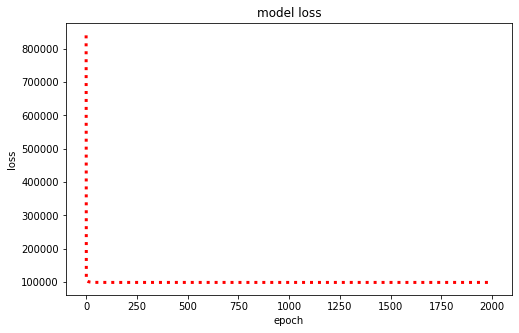




                                            Gender        Age       Pace

                                              Male         24        297


                                              **** Records Prediction ****

        Distance(km)                    Real record                  ML Prediction    Variation(Second)

              10.000                 00:30:28(1828)            00:31:57(1917.8452)              -89.845

              20.000                 01:01:15(3675)            01:02:19(3739.9958)              -64.996

              30.000                 01:33:01(5581)            01:31:23(5483.9956)               97.004

              42.195                 02:09:37(7777)             02:09:39(7779.303)               -2.303



In [ ]:
# 초를 시간형식으로 변환해 주는 함수
def seconds_to_hhmmss(seconds):
    hours = seconds // (60*60)
    seconds %= (60*60)
    minutes = seconds // 60
    seconds %= 60
    return "%02i:%02i:%02i" % (hours, minutes, seconds)

# normalization
def normalization(record):
    r0 = record[0]
    r1 = record[1] / 10
    r2 = record[2] / 100
    return [r0, r1, r2]

# 만들어진 모델에 대해 train dataset의 loss 를 그래프로 표현
def display_graph():
    plt.figure(figsize=(8,5))

    plt.plot(history.history['loss'], 'r:', linewidth=3)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

    plt.show()
    
# pandas 를 불러옵니다.
import pandas as pd

# marathon_2015_2017.csv 파일을 읽어와 marathon_2015_2017 DataFrame 을 생성합니다.
marathon_2015_2017 = pd.read_csv("gdrive/My Drive/MLDL/marathon_data/marathon_2015_2017.csv")
# 'M/F' column은 'M'->1, 'F'->0 으로 변환하여 저장합니다.
marathon_2015_2017['M/F'] = marathon_2015_2017['M/F'].map({'M': 1, 'F': 0})

# 2015~2016년도 데이터만 가져와 marathon_2015_2016 DataFrame을 생성합니다.
marathon_2015_2016 = marathon_2015_2017[marathon_2015_2017['Year'] != 2017]
# 2017년도 데이터만 가져와 marathon_2017 DataFrame 생성합니다.
marathon_2017 = marathon_2015_2017[marathon_2015_2017['Year'] == 2017]

# marathon_2015_2016에서 'M/F',  'Age',  'Pace',  '10K', '20K',  '30K',  'Official Time' column만 가져옵니다.
df_2015_2016 = pd.DataFrame(marathon_2015_2016,columns=['M/F',  'Age',  'Pace',  '10K', '20K',  '30K',  'Official Time'])
# marathon_2017에서 'M/F',  'Age',  'Pace',  '10K', '20K',  '30K',  'Official Time' column만 가져옵니다.
df_2017 = pd.DataFrame(marathon_2017,columns=['M/F',  'Age',  'Pace',  '10K', '20K',  '30K',  'Official Time'])

# df_2015_2016 DataFrame을 리스트로 변환합니다.
record_2015_2016 = df_2015_2016.values.tolist()
# df_2017 DataFrame을 리스트로 변환합니다.
record_2017 = df_2017.values.tolist()

# gender_list 정의
gender_list = ['Female', 'Male']

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

t_t = 2000    # training 횟수(epoch)
t_r = 0.01    # learning rate
t_s = 1       # 등수

# train dataset 정의
x_train = [normalization(r[0:3]) for r in record_2015_2016]
y_train = [r[3:7] for r in record_2015_2016]

# test dataset 정의
x_test = [normalization(r[0:3]) for r in record_2017]
y_test = [r[3:7] for r in record_2017]

# 모델 구성하기
model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(3,)))  # input은 3개, output 은 4개
# 모델 학습과정 설정하기
sgd = tf.keras.optimizers.SGD(lr=t_r)
model.compile(loss='mse', optimizer=sgd)

# 모델 구성 확인하기
model.summary()

# 모델 학습시키기
history = model.fit(np.array(x_train), np.array(y_train), epochs=t_t, batch_size=128)

# 그래프 출력
display_graph()

# 예측하기
runner = x_test[t_s-1]
time = model.predict(np.array([runner]))

# 마라톤 구간 리스트
distance = [10., 20., 30., 42.195]

# 예측 결과 출력
print('\n\n')
print("%50s %10s %10s" % ('Gender', 'Age', 'Pace')+'\n')
print("%50s %10s %10s" % (gender_list[record_2017[t_s-1][0]], str(record_2017[t_s-1][1]), str(record_2017[t_s-1][2]))+'\n\n')
print("%75s" % ('**** Records Prediction ****\n'))
print("%20s %30s %30s %20s" % ('Distance(km)', 'Real record', 'ML Prediction', 'Variation(Second)')+'\n')

for i in range(len(time[0])):
    real_time = seconds_to_hhmmss(y_test[t_s-1][i]) + '(' + str(y_test[t_s-1][i]) + ')'
    ml_time = seconds_to_hhmmss(time[0][i]) + '(' + str(time[0][i]) + ')'
    variation = y_test[t_s-1][i] - time[0][i]
    print("%20.3f %30s %30s %20.3f" % (distance[i], real_time, ml_time, variation)+'\n')

In [ ]:
t_s = 300  # 등수

# test dataset 으로 예측
runner = x_test[t_s-1]
time = model.predict(np.array([runner]))

# 마라톤 구간 리스트
distance = [10., 20., 30., 42.195]

# 예측 결과 출력
print('\n\n')
print("%50s %10s %10s" % ('Gender', 'Age', 'Pace')+'\n')
print("%50s %10s %10s" % (gender_list[record_2017[t_s-1][0]], str(record_2017[t_s-1][1]), str(record_2017[t_s-1][2]))+'\n\n')
print("%75s" % ('**** Records Prediction ****\n'))
print("%20s %30s %30s %20s" % ('Distance(km)', 'Real record', 'ML Prediction', 'Variation(Second)')+'\n')

for i in range(len(time[0])):
    real_time = seconds_to_hhmmss(y_test[t_s-1][i]) + '(' + str(y_test[t_s-1][i]) + ')'
    ml_time = seconds_to_hhmmss(time[0][i]) + '(' + str(time[0][i]) + ')'
    variation = y_test[t_s-1][i] - time[0][i]
    print("%20.3f %30s %30s %20.3f" % (distance[i], real_time, ml_time, variation)+'\n')




                                            Gender        Age       Pace

                                              Male         28        376


                                              **** Records Prediction ****

        Distance(km)                    Real record                  ML Prediction    Variation(Second)

              10.000                 00:39:05(2345)            00:38:10(2290.0723)               54.928

              20.000                 01:16:56(4616)            01:15:45(4545.7344)               70.266

              30.000                 01:55:44(6944)            01:54:04(6844.8784)               99.122

              42.195                 02:44:05(9845)             02:44:08(9848.351)               -3.351

